<a href="https://colab.research.google.com/github/adityaras/Reinforcement-Learning-CSE564-M2020/blob/master/HW1/RL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
def e_greedy(epsilon):
  sum_rt=[0]*1000
  for j in range(2000):  
    q_star=[]
    for i1 in range(10):
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10
    times_picked=[0]*10
    for i in range(1000):
      prob=random.random()
      if prob <= epsilon :
        ind=random.randint(0,9)    
      else:
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],1)
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      sum_rt[i]+=r_t
  for k in range(1000):
    sum_rt[k]=sum_rt[k]/2000
  return sum_rt



In [45]:
eps_0pnt1=e_greedy(0.1)
eps_0pnt01=e_greedy(0.01)
eps_0=e_greedy(0)

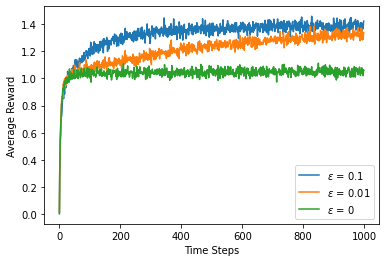

In [52]:
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

In [53]:
eps_t=[0]*1000
for j in range(2000):  
  q_star=[]
  for i1 in range(10):
    q_star.append(np.random.normal(0,1))
  Q_t=[0]*10
  times_picked=[0]*10
  for i in range(1,1001):
    epsilon = 1/i
    prob=random.random()
    if prob <= epsilon :
      ind=random.randint(0,9)    
    else:
      ind=np.argmax(Q_t)
    times_picked[ind]+=1
    r_t=np.random.normal(q_star[ind],1)
    Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
    eps_t[i-1]+=r_t
for k in range(1000):
  eps_t[k]=eps_t[k]/2000


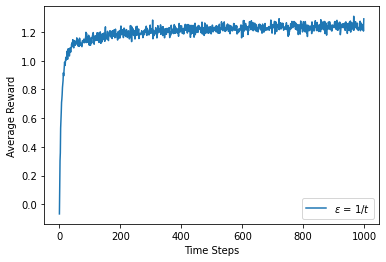

In [54]:
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()